# (Loan Data from Prosper)
## by (Ahmed Harhash)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read Dataset
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# remove columns that contain null values
df.dropna(axis=1,inplace=True)

# remove dublicates
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 38 columns):
ListingKey                         113066 non-null object
ListingNumber                      113066 non-null int64
ListingCreationDate                113066 non-null object
Term                               113066 non-null int64
LoanStatus                         113066 non-null object
BorrowerRate                       113066 non-null float64
LenderYield                        113066 non-null float64
ListingCategory (numeric)          113066 non-null int64
IsBorrowerHomeowner                113066 non-null bool
CurrentlyInGroup                   113066 non-null bool
DateCreditPulled                   113066 non-null object
OpenRevolvingAccounts              113066 non-null int64
OpenRevolvingMonthlyPayment        113066 non-null float64
IncomeRange                        113066 non-null object
IncomeVerifiable                   113066 non-null bool
StatedMonthlyIncome       

### What is the structure of your dataset?

> After some wrangling it has 113066 non null observations and 38 features

### What is/are the main feature(s) of interest in your dataset?

> Loan original amoun and Loan status

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Term , Is borrower homeowner , Income range ,lender yield , open accounts and investors.

## Univariate Exploration



In [5]:
color = sb.color_palette()[0]

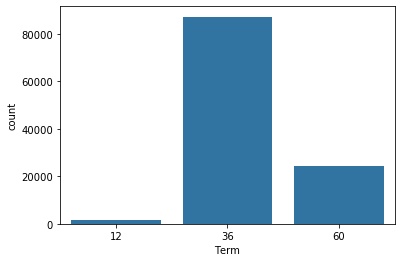

In [6]:
sb.countplot(df.Term,color = color)
plt.show()

> Most loans have 36 months length

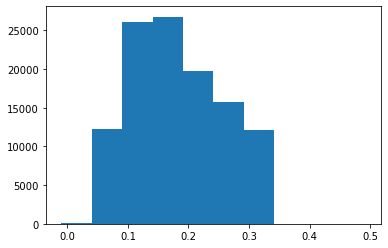

In [7]:
plt.hist(df.LenderYield)
plt.show()

> Lender yield ranges between 0.05 to 0.35

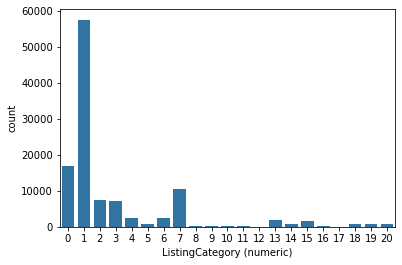

In [8]:
sb.countplot(df['ListingCategory (numeric)'],color=color)
plt.show()

> Most loans listed as Debt consolidation

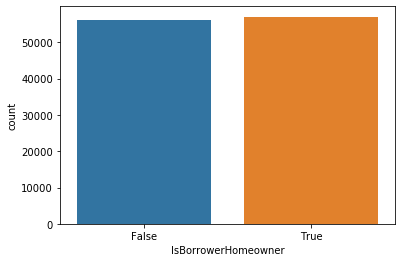

In [9]:
sb.countplot(df.IsBorrowerHomeowner)
plt.show()

> This looks like a tie !

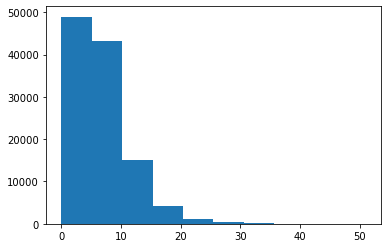

In [10]:
plt.hist(df.OpenRevolvingAccounts)
plt.show()

> There are outliers 
Imagine someone having active 20 accounts or more !

In [11]:
#remove observations with accounts more than 20
df = df[df.OpenRevolvingAccounts <= 20]
df.shape

(111467, 38)

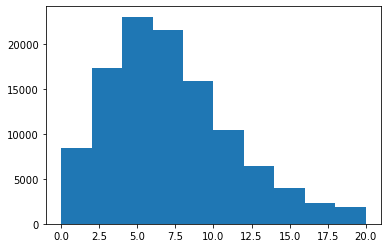

In [12]:
plt.hist(df.OpenRevolvingAccounts)
plt.show()

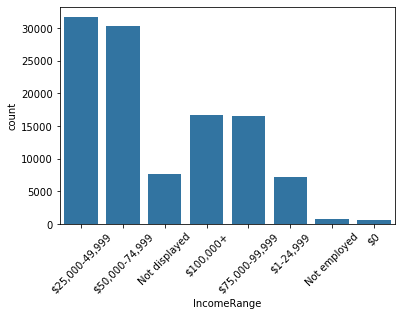

In [13]:
sb.countplot(df.IncomeRange,color=color)
plt.xticks(rotation=45)
plt.show()

> Most income range 25k-50k

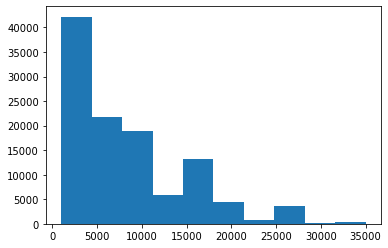

In [14]:
plt.hist(df.LoanOriginalAmount)
plt.show()

> Most loans range between 1k to 5k

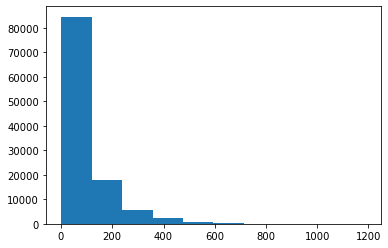

In [15]:
plt.hist(df.Investors)
plt.show()

> There are some outliers that needs to be removed

In [16]:
#remove loans with investors more than 250
df = df[df.Investors<=250]
df.shape

(103322, 38)

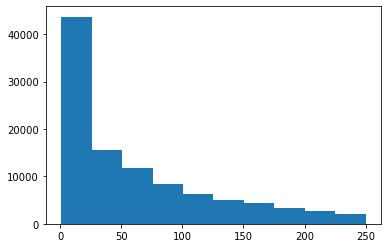

In [17]:
plt.hist(df.Investors)
plt.show()

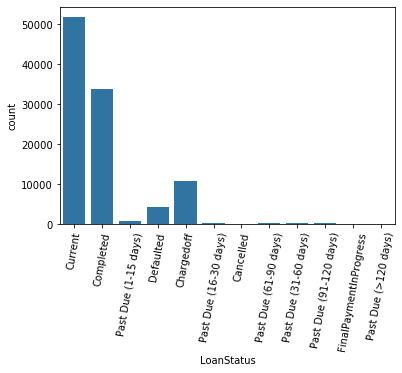

In [18]:
sb.countplot(df.LoanStatus,color =color)
plt.xticks(rotation=80)
plt.show()

> There are alot of past due that needs to be grouped

In [19]:
# change all past due to single value
past_due = df[df.LoanStatus.str.contains("Past Due")]
past_due['LoanStatus'] = 'Past Due'

C:\Users\Harhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
#remove old past due rows
df = df[~df.LoanStatus.str.contains("Past Due",na=False)]

In [21]:
#concat new ones
df = pd.concat([df,past_due],ignore_index=True)

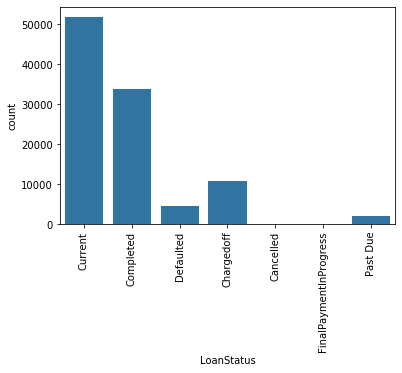

In [22]:
sb.countplot(df.LoanStatus,color = color)
plt.xticks(rotation = 90)
plt.show()

> cancelled and final payment are very low 

In [23]:
#remove cancelled and final payment
df = df[~df.LoanStatus.str.contains("Cancelled",na=False)]
df = df[~df.LoanStatus.str.contains("FinalPaymentInProgress",na=False)]
df.shape

(103128, 38)

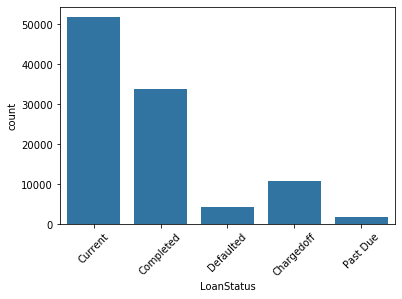

In [24]:
sb.countplot(df.LoanStatus,color=color)
plt.xticks(rotation = 45)
plt.show()

## Bivariate Exploration

> After each graph there is my obsrvations

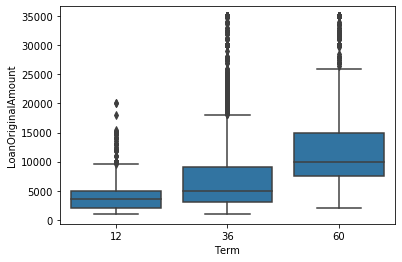

In [25]:
sb.boxplot(x='Term',y="LoanOriginalAmount",data=df,color=color)
plt.show()

> Seems logical bigger amount of money needs more time

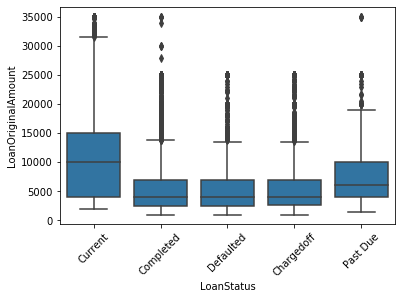

In [26]:
sb.boxplot(x='LoanStatus',y='LoanOriginalAmount',data=df,color=color)
plt.xticks(rotation=45)
plt.show()

> Even small loans can be past due

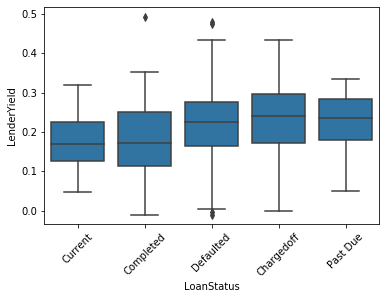

In [27]:
sb.boxplot(x='LoanStatus',y='LenderYield',data=df ,color =color)
plt.xticks(rotation=45)
plt.show()

> The mean of all seems prety close

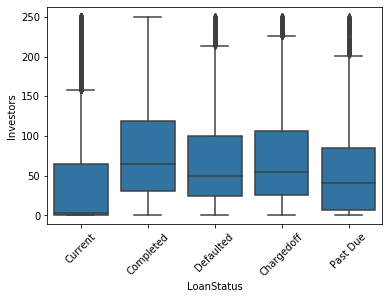

In [28]:
sb.boxplot(x='LoanStatus',y='Investors',data=df ,color =color)
plt.xticks(rotation=45)
plt.show()

> Number of investors looks like doesn't have that much of effect

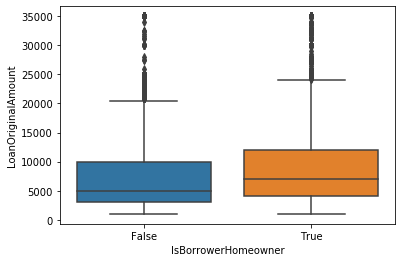

In [29]:
sb.boxplot(x='IsBorrowerHomeowner',y='LoanOriginalAmount',data=df)
plt.show()

> Being Homeowner has slightly higher mean of loan original amount

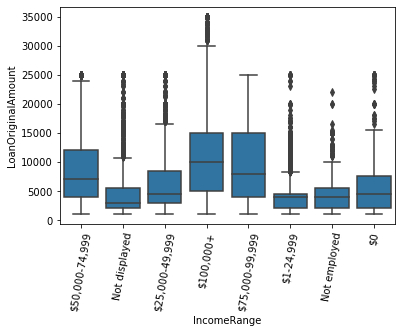

In [30]:
sb.boxplot(x='IncomeRange',y='LoanOriginalAmount',data=df,color=color)
plt.xticks(rotation=80)
plt.show()

> Bigger Loan amount related to higher income range

## Multivariate Exploration

> After each graph there is my obsrvations

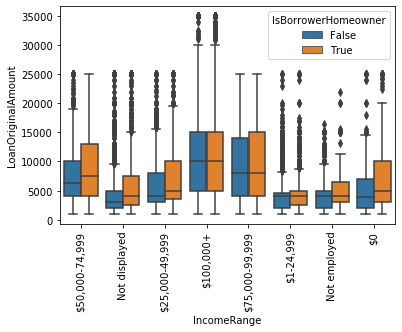

In [31]:
sb.boxplot(data=df,y='LoanOriginalAmount',x='IncomeRange',hue='IsBorrowerHomeowner')
plt.xticks(rotation=90)
plt.show()

> Being Homeowner helped not employed group and group with 0 income to get higher Loan amount

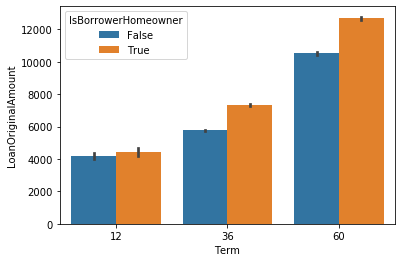

In [34]:
sb.barplot(data=df,y='LoanOriginalAmount',x='Term',hue='IsBorrowerHomeowner')
plt.show()

> Being Homeowner helped to get bigger loan amount in the same term

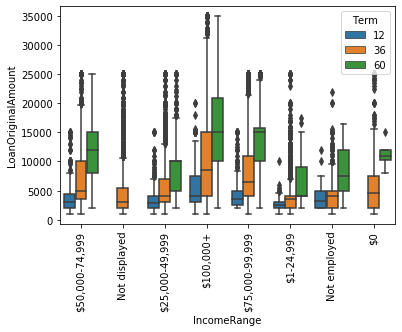

In [37]:
sb.boxplot(data=df,y='LoanOriginalAmount',x='IncomeRange',hue='Term')
plt.xticks(rotation=90)
plt.show()

> Bigger loan amounts need longer period regardless Income range